KNN

preprocess

checking values of model for diff k values 
1 - 15 

test acc and train acc with graph

changing diff parameters, diff algos

classification report, consusion mat
decision boundarries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\MIT ADT\Third Year - Sem 2\ML LAB\Assign 7 - KNN\winequalityN.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df.duplicated().sum()

1168

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [9]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

col_impute = ["fixed acidity", "volatile acidity", "citric acid", 'residual sugar', 'chlorides', 'pH', 'sulphates']

for i in col_impute:
    df[i] = imputer.fit_transform(df[[i]]).ravel()
    





In [11]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df['type'] = lbl_enc.fit_transform(df['type'])


In [12]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [13]:
df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486310,-0.644478,0.183703,0.328597,-0.499735,0.465295,0.694181,-0.428757,-0.310342,-0.489255,0.057334,0.114889
fixed acidity,-0.486310,1.000000,0.215063,0.329085,-0.104652,0.288898,-0.281588,-0.327327,0.477807,-0.270147,0.305710,-0.102778,-0.080482
volatile acidity,-0.644478,0.215063,1.000000,-0.383113,-0.163926,0.367330,-0.349337,-0.401499,0.307121,0.245854,0.225871,-0.064840,-0.264307
citric acid,0.183703,0.329085,-0.383113,1.000000,0.146526,0.054922,0.132147,0.195084,0.094852,-0.343196,0.060445,-0.005557,0.098774
residual sugar,0.328597,-0.104652,-0.163926,0.146526,1.000000,-0.123314,0.398811,0.487338,0.521661,-0.233905,-0.174800,-0.306092,-0.057503
chlorides,-0.499735,0.288898,0.367330,0.054922,-0.123314,1.000000,-0.186824,-0.270034,0.371442,0.026535,0.404614,-0.269132,-0.202115
free sulfur dioxide,0.465295,-0.281588,-0.349337,0.132147,0.398811,-0.186824,1.000000,0.720666,0.006687,-0.141315,-0.198378,-0.170396,0.054456
total sulfur dioxide,0.694181,-0.327327,-0.401499,0.195084,0.487338,-0.270034,0.720666,1.000000,0.007359,-0.222407,-0.274619,-0.249597,-0.050387
density,-0.428757,0.477807,0.307121,0.094852,0.521661,0.371442,0.006687,0.007359,1.000000,0.034152,0.282221,-0.668216,-0.326978
pH,-0.310342,-0.270147,0.245854,-0.343196,-0.233905,0.026535,-0.141315,-0.222407,0.034152,1.000000,0.166237,0.097453,0.039876


In [14]:
df = df.drop(["fixed acidity", "volatile acidity", "chlorides", "density", "pH", "sulphates"], axis=1)

<Axes: >

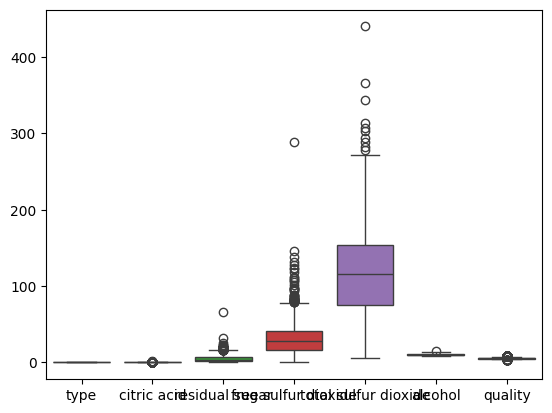

In [15]:
sns.boxplot(df)


In [16]:
df.columns

Index(['type', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol', 'quality'],
      dtype='object')

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = ((df<(Q1-1.5*IQR))| df>(Q3+1.5*IQR)).any(axis=1)

df_no_outliers = df[~outliers]

<Axes: >

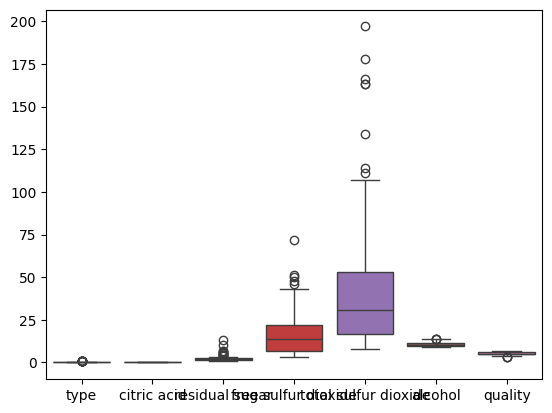

In [18]:
sns.boxplot(df_no_outliers)

In [19]:
X = df.drop("type", axis=1)
y = df["type"]

In [20]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2,random_state=0)

print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(4263, 6) (1066, 6)
(4263,) (1066,)


In [21]:
#Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_std = scaler.fit_transform(Xtrain)
Xtest_std = scaler.transform(Xtest)


class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [22]:
X.isna().sum()

citric acid             0
residual sugar          0
free sulfur dioxide     0
total sulfur dioxide    0
alcohol                 0
quality                 0
dtype: int64

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#neigh = KNeighborsClassifier(n_neighbors=3)

train_acc = np.zeros(15)
test_acc = np.zeros(15)

for i in range(1,15):
    print("Neighbours: ", i)
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(Xtrain_std, ytrain)
    train_acc[i] = neigh.score(Xtrain_std, ytrain)
    test_acc[i] = neigh.score(Xtest_std, ytest)
    print("Training accuracy: ", neigh.score(Xtrain_std, ytrain))
    print("Testing Accuracy: ", neigh.score(Xtest_std, ytest))
    ypred = neigh.predict(Xtest_std)
    print("Accuracy Score: ", accuracy_score(ytest, ypred))

Neighbours:  1
Training accuracy:  0.9995308468214872
Testing Accuracy:  0.9390243902439024
Accuracy Score:  0.9390243902439024
Neighbours:  2
Training accuracy:  0.9673938540933614
Testing Accuracy:  0.924015009380863
Accuracy Score:  0.924015009380863
Neighbours:  3
Training accuracy:  0.9643443584330283
Testing Accuracy:  0.948405253283302
Accuracy Score:  0.948405253283302
Neighbours:  4
Training accuracy:  0.956368754398311
Testing Accuracy:  0.9409005628517824
Accuracy Score:  0.9409005628517824
Neighbours:  5
Training accuracy:  0.9573070607553367
Testing Accuracy:  0.948405253283302
Accuracy Score:  0.948405253283302
Neighbours:  6
Training accuracy:  0.9537884119164908
Testing Accuracy:  0.9446529080675422
Accuracy Score:  0.9446529080675422
Neighbours:  7
Training accuracy:  0.9556650246305419
Testing Accuracy:  0.9455909943714822
Accuracy Score:  0.9455909943714822
Neighbours:  8
Training accuracy:  0.952146375791696
Testing Accuracy:  0.9418386491557224
Accuracy Score:  0.9

In [24]:
print(test_acc)
print(train_acc)

[0.         0.93902439 0.92401501 0.94840525 0.94090056 0.94840525
 0.94465291 0.94559099 0.94183865 0.94840525 0.94090056 0.94559099
 0.94371482 0.94465291 0.94090056]
[0.         0.99953085 0.96739385 0.96434436 0.95636875 0.95730706
 0.95378841 0.95566502 0.95214638 0.95285011 0.95167722 0.95050434
 0.94745484 0.94980061 0.94862773]


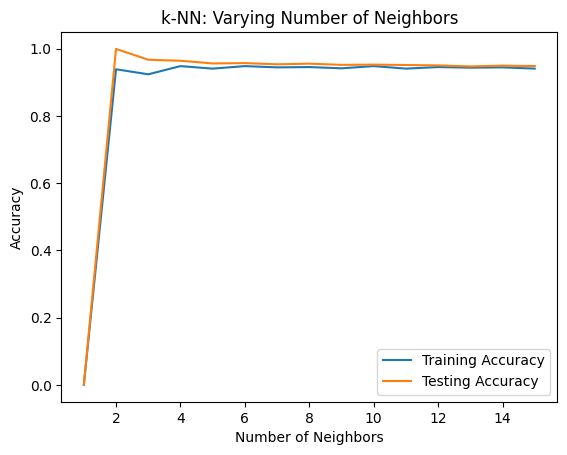

In [25]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,16), test_acc, label='Training Accuracy')
plt.plot(range(1,16), train_acc, label = "Testing Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


BEST K NEIGHBOURS = 4

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

Parameters:
n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.

weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

Refer to the example entitled Nearest Neighbors Classification showing the impact of the weights parameter on the decision boundary.

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.




In [26]:
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

for i in weights:
    print("WEIGHT: ", i)

    for j in algo:
        print("Algorith used: ", j)
        knn = KNeighborsClassifier(n_neighbors=4, algorithm=j, weights=i)
        knn.fit(Xtrain_std, ytrain)
        print("Training accuracy: ", knn.score(Xtrain_std, ytrain))
        print("Testing Accuracy: ", knn.score(Xtest_std, ytest))
        print()


WEIGHT:  uniform
Algorith used:  auto
Training accuracy:  0.956368754398311
Testing Accuracy:  0.9409005628517824

Algorith used:  ball_tree
Training accuracy:  0.956368754398311
Testing Accuracy:  0.9409005628517824

Algorith used:  kd_tree
Training accuracy:  0.956368754398311
Testing Accuracy:  0.9409005628517824

Algorith used:  brute
Training accuracy:  0.956368754398311
Testing Accuracy:  0.9409005628517824

WEIGHT:  distance
Algorith used:  auto
Training accuracy:  0.9995308468214872
Testing Accuracy:  0.9521575984990619

Algorith used:  ball_tree
Training accuracy:  0.9995308468214872
Testing Accuracy:  0.9521575984990619

Algorith used:  kd_tree
Training accuracy:  0.9995308468214872
Testing Accuracy:  0.9521575984990619

Algorith used:  brute
Training accuracy:  0.9995308468214872
Testing Accuracy:  0.9521575984990619



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=4, algorithm="auto", weights="uniform")
knn.fit(Xtrain_std, ytrain)
y_pred = knn.predict(Xtest_std)
cm = confusion_matrix(ytest, y_pred)
print(cm)

[[249  24]
 [ 39 754]]


In [28]:
cr = classification_report(ytest, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       273
           1       0.97      0.95      0.96       793

    accuracy                           0.94      1066
   macro avg       0.92      0.93      0.92      1066
weighted avg       0.94      0.94      0.94      1066



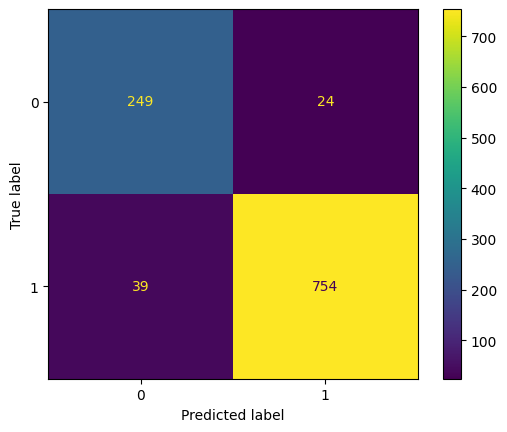

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm)
disp.plot()